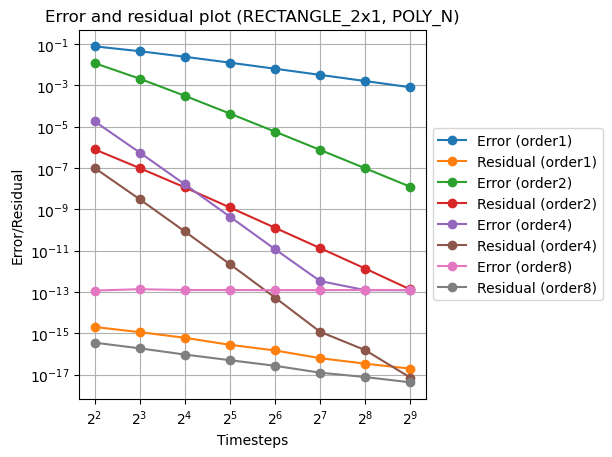

In [2]:
import pandas as pd
import os

mesh_type = 'RECTANGLE_2x1' # 'UNIT_SQUARE' or 'RECTANGLE_2x1'
equation = 'POLY_N'
orders = ['order1', 'order2', 'order4', 'order8']

print_full_stats = False
convergence_analysis = True

if print_full_stats:
    for order in orders:
        data_dir = f'data/{mesh_type}/{equation}/{order}'
        full_stats_files = os.listdir(data_dir + '/statistics')
        for file in full_stats_files:
            if file.endswith('.csv'):
                df = pd.read_csv(f'{data_dir}/statistics/{file}')
                print(df)
                
if convergence_analysis:
    fulldf = pd.DataFrame()
    columns = []
    for order in orders:
        file_path = f'data/{mesh_type}/{equation}/{order}/convergence_data.csv'
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f'Error reading {file_path}: {e}')
            continue
        
        df.rename(columns={'error': f'error_{order}', 'residual': f'residual_{order}'}, inplace=True)
        
        if fulldf.empty:
            fulldf.insert(0, 'timesteps', df['timesteps'])
        
        fulldf.insert(len(fulldf.columns), f'Error ({order})', df['final_error'])
        fulldf.insert(len(fulldf.columns), f'Residual ({order})', df['final_residual'])
        columns += [f'Error ({order})', f'Residual ({order})']

ax = fulldf.plot(
            title=f'Error and residual plot ({mesh_type}, {equation})',
            x='timesteps',
            y=columns,
            marker='o'
            )
        
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Error/Residual')
ax.grid(True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

